D:\anaxonda3\anaconda\lib\site-packages\ipykernel_launcher.py:14: WavFileWarning: Chunk (non-data) not understood, skipping it.
  



<class 'numpy.float64'>
(576048, 2)


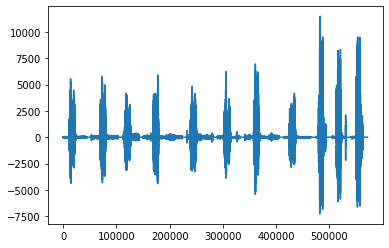

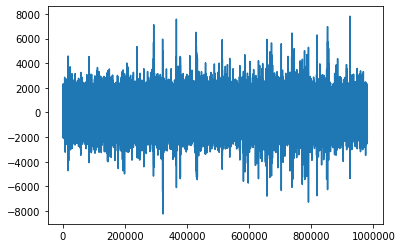

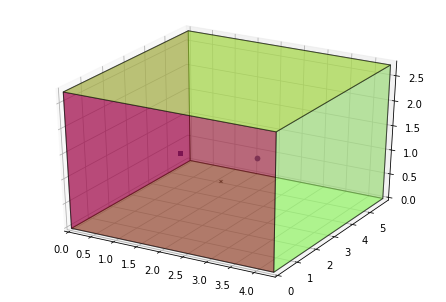

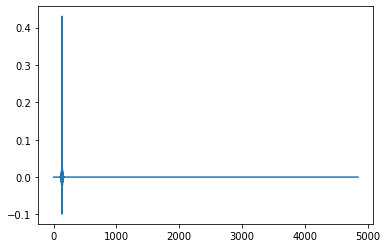

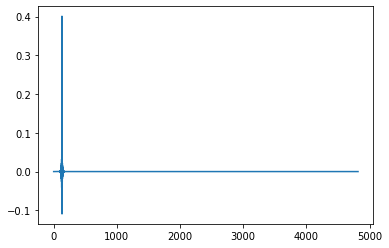

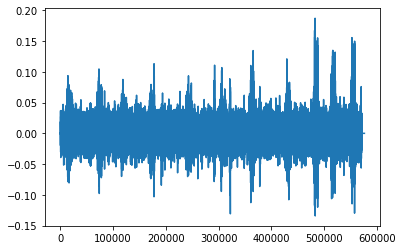

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pyroomacoustics as pra
import scipy
from scipy.io.wavfile import read
from scipy.io.wavfile import write
from scipy.io import wavfile
from scipy.signal import fftconvolve
import IPython
from scipy.signal import firwin, freqz, lfilter, welch 

# specify signal and noise source
fs, signal = read("testUter.wav")
fs, noise = read("testNoise.wav")  # may spit out a warning when reading but it's alright!
plt.figure(100)
plt.plot(signal)
plt.figure(101)
plt.plot(noise)

Lg_t = 0.100                # filter size in seconds
Lg = np.ceil(Lg_t*fs)       # in samples



# Create 4x6 shoebox room with source and interferer and simulate
room_bf = pra.ShoeBox([4.34,5.95, 2.73], fs=fs, absorption = 1.0, max_order = 17)
source = np.array([2.15, 4.5, .78])
interferer = np.array([0.73579, 3.81421, .78 ])
room_bf.add_source(source, delay=0., signal=signal)
room_bf.add_source(interferer, delay=0., signal=noise[:len(signal)])

# Create geometry equivalent to Amazon Echo
center = [2.15, 2.5]; radius = 37.5e-3
fft_len = 512
# echo = pra.circular_2D_array(center=center, M=6, phi0=0, radius=radius)
#echo = pra.linear_2D_array(center, 4, 0, 0.033)

echo = np.c_[
    [2.1995, 2.5, .78],  # mic 1
    [2.1665, 2.5, .78],  # mic 2
      # mic 3
      # mic 4
    ]
#echo = np.concatenate((echo, np.array(center, ndmin=2).T), axis=1)
mics = pra.Beamformer(echo, room_bf.fs, N=fft_len, Lg=Lg)
room_bf.add_microphone_array(mics)

# Compute DAS weights
mics.rake_delay_and_sum_weights(room_bf.sources[0][:1])

# plot the room and resulting beamformer before simulation
fig, ax = room_bf.plot(freq=[500, 1000, 2000, 4000], img_order=0)
#ax.legend(['500', '1000', '2000', '4000'])
#fig.set_size_inches(20, 8)


room_bf.compute_rir()
print()
plt.figure(222)
plt.plot(room_bf.rir[1][0])
plt.figure(223)
plt.plot(room_bf.rir[1][1])
room_bf.simulate()
amplitude = np.iinfo(np.int16).max
mic_sigs = np.transpose(room_bf.mic_array.signals)/amplitude
print(type(mic_sigs[1][1]))
print(mic_sigs.shape)
plt.figure(111)
plt.plot(mic_sigs[:,1])
plt.show()
write('pyrmTst2micWn1.wav', rate=fs, data=mic_sigs)
signal_das = mics.process(FD=False)
#write('pyrmTst4micDas.wav', rate=fs, data=signal_das)

In [15]:
IPython.display.Audio(signal_das, rate=fs)


<class 'numpy.float64'>
(576048, 2)


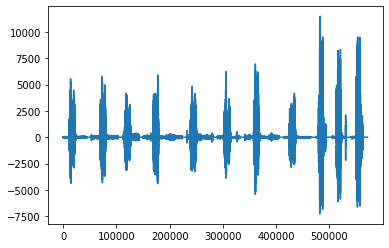

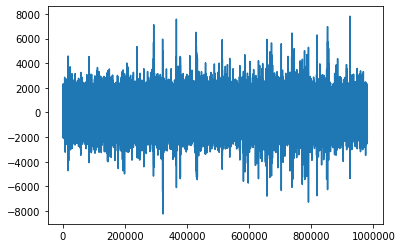

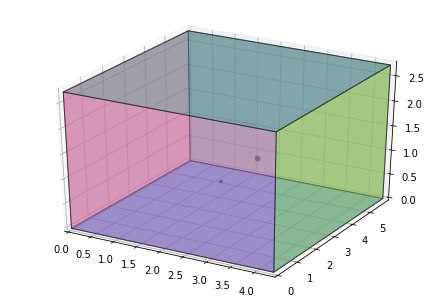

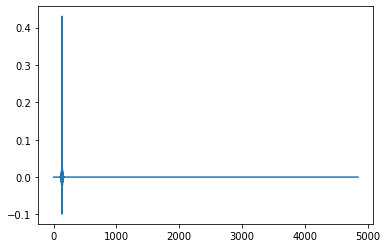

<Figure size 432x288 with 0 Axes>

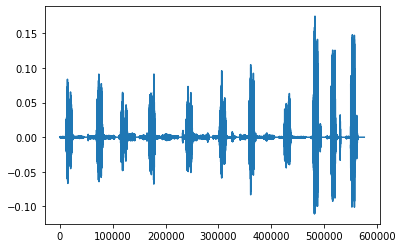

In [16]:
# specify signal and noise source
fs, signal = read("testUter.wav")
#fs, noise = read("testNoise.wav")  # may spit out a warning when reading but it's alright!
plt.figure(100)
plt.plot(signal)
plt.figure(101)
plt.plot(noise)

Lg_t = 0.100                # filter size in seconds
Lg = np.ceil(Lg_t*fs)       # in samples



# Create 4x6 shoebox room with source and interferer and simulate
room_bf = pra.ShoeBox([4.34,5.95, 2.73], fs=fs, absorption = 1.0, max_order = 17)
source = np.array([2.15, 4.5, .78])
interferer = np.array([0.73579, 3.81421, .78 ])
room_bf.add_source(source, delay=0., signal=signal)
#room_bf.add_source(interferer, delay=0., signal=noise[:len(signal)])

# Create geometry equivalent to Amazon Echo
center = [2.15, 2.5]; radius = 37.5e-3
fft_len = 512
# echo = pra.circular_2D_array(center=center, M=6, phi0=0, radius=radius)
#echo = pra.linear_2D_array(center, 4, 0, 0.033)

echo = np.c_[
    [2.1995, 2.5, .78],  # mic 1
    [2.1665, 2.5, .78],  # mic 2
      # mic 3
      # mic 4
    ]
#echo = np.concatenate((echo, np.array(center, ndmin=2).T), axis=1)
mics = pra.Beamformer(echo, room_bf.fs, N=fft_len, Lg=Lg)
room_bf.add_microphone_array(mics)

# Compute DAS weights
mics.rake_delay_and_sum_weights(room_bf.sources[0][:1])

# plot the room and resulting beamformer before simulation
fig, ax = room_bf.plot(freq=[500, 1000, 2000, 4000], img_order=0)
#ax.legend(['500', '1000', '2000', '4000'])
#fig.set_size_inches(20, 8)


room_bf.compute_rir()
print()
plt.figure(222)
plt.plot(room_bf.rir[1][0])
plt.figure(223)
#plt.plot(room_bf.rir[1][1])
room_bf.simulate()
amplitude = np.iinfo(np.int16).max
mic_sigs = np.transpose(room_bf.mic_array.signals)/amplitude
print(type(mic_sigs[1][1]))
print(mic_sigs.shape)
plt.figure(111)
plt.plot(mic_sigs[:,1])
plt.show()
write('pyrmTst2micWn2.wav', rate=fs, data=mic_sigs)
signal_das = mics.process(FD=False)
#write('pyrmTst4micDas.wav', rate=fs, data=signal_das)

In [18]:
IPython.display.Audio(signal_das, rate=fs)

D:\anaxonda3\anaconda\lib\site-packages\ipykernel_launcher.py:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  This is separate from the ipykernel package so we can avoid doing imports until



<class 'numpy.float64'>
(576016, 2)


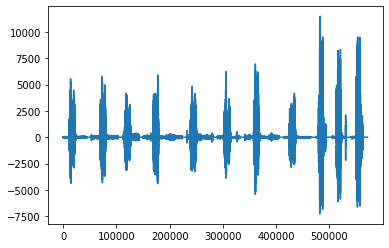

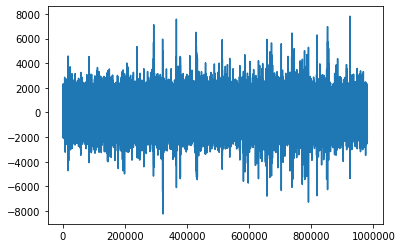

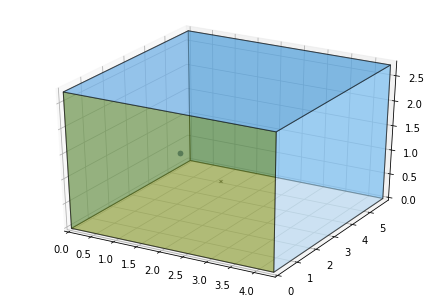

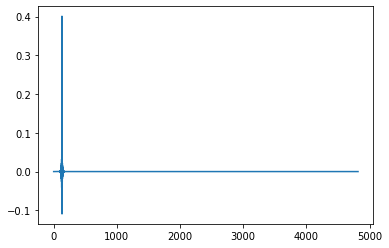

<Figure size 432x288 with 0 Axes>

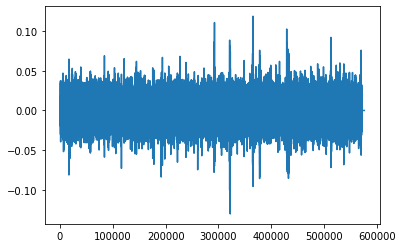

In [23]:
# specify signal and noise source
#fs, signal = read("testUter.wav")
fs, noise = read("testNoise.wav")  # may spit out a warning when reading but it's alright!
plt.figure(100)
plt.plot(signal)
plt.figure(101)
plt.plot(noise)

Lg_t = 0.100                # filter size in seconds
Lg = np.ceil(Lg_t*fs)       # in samples



# Create 4x6 shoebox room with source and interferer and simulate
room_bf = pra.ShoeBox([4.34,5.95, 2.73], fs=fs, absorption = 1.0, max_order = 17)
source = np.array([2.15, 4.5, .78])
interferer = np.array([0.73579, 3.81421, .78 ])
#room_bf.add_source(source, delay=0., signal=signal)
room_bf.add_source(interferer, delay=0., signal=noise[:len(signal)])

# Create geometry equivalent to Amazon Echo
center = [2.15, 2.5]; radius = 37.5e-3
fft_len = 512
# echo = pra.circular_2D_array(center=center, M=6, phi0=0, radius=radius)
#echo = pra.linear_2D_array(center, 4, 0, 0.033)

echo = np.c_[
    [2.1995, 2.5, .78],  # mic 1
    [2.1665, 2.5, .78],  # mic 2
      # mic 3
      # mic 4
    ]
#echo = np.concatenate((echo, np.array(center, ndmin=2).T), axis=1)
mics = pra.Beamformer(echo, room_bf.fs, N=fft_len, Lg=Lg)
room_bf.add_microphone_array(mics)

# Compute DAS weights
mics.rake_delay_and_sum_weights(room_bf.sources[0][:1])

# plot the room and resulting beamformer before simulation
fig, ax = room_bf.plot(freq=[500, 1000, 2000, 4000], img_order=0)
#ax.legend(['500', '1000', '2000', '4000'])
#fig.set_size_inches(20, 8)


room_bf.compute_rir()
print()
plt.figure(222)
plt.plot(room_bf.rir[1][0])
plt.figure(223)
#plt.plot(room_bf.rir[1][1])
room_bf.simulate()
amplitude = np.iinfo(np.int16).max
mic_sigs = np.transpose(room_bf.mic_array.signals)/amplitude
print(type(mic_sigs[1][1]))
print(mic_sigs.shape)
plt.figure(111)
plt.plot(mic_sigs[:,1])
plt.show()
write('pyrmTst2micWn3.wav', rate=fs, data=mic_sigs)
signal_das = mics.process(FD=False)
#write('pyrmTst4micDas.wav', rate=fs, data=signal_das)

In [24]:
IPython.display.Audio(signal_das, rate=fs)